In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

## Load Audio File

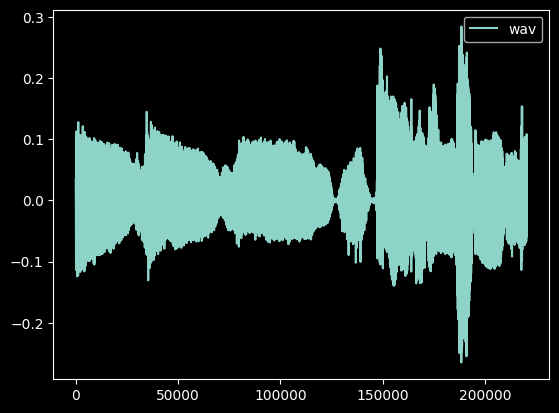

In [2]:
AUDIO_PATH = './test.wav'
wav, sr = sf.read(AUDIO_PATH)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Basic Delay

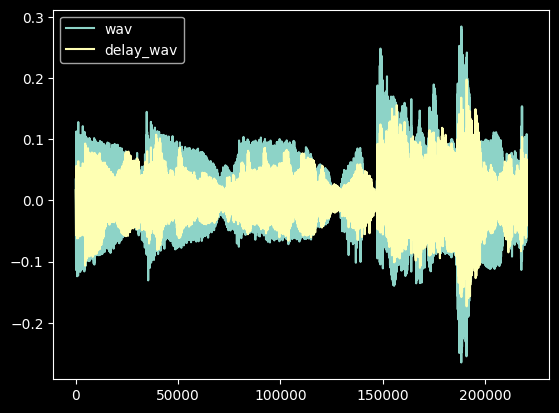

In [3]:
from diffFx_pytorch.processors.delay import BasicDelay      
DELAY_DSP_PARAMS = {
    'delay_ms': 100.0,
    'mix': 0.5
}

Processor = BasicDelay(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
delay_wav = Processor(test_wav, None, DELAY_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=delay_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(delay_wav.squeeze().cpu().numpy(),      label='delay_wav')
plt.legend()

## Basic FeedbackDelay

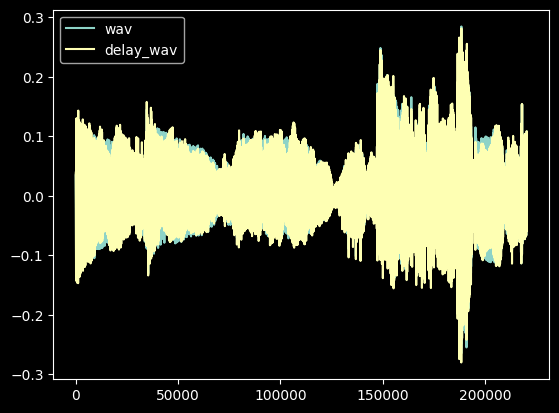

In [4]:
from diffFx_pytorch.processors.delay import BasicFeedbackDelay      
DELAY_DSP_PARAMS = {
    'delay_ms': 100.0,
    'mix': 0.6,
    'fb_gain': 0.5,
    'ff_gain': 0.5
}

Processor = BasicFeedbackDelay(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
delay_wav = Processor(test_wav, None, DELAY_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=delay_wav.squeeze().cpu().numpy() * 0.6, rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(delay_wav.squeeze().cpu().numpy(),      label='delay_wav')
plt.legend()

## Slapback Delay

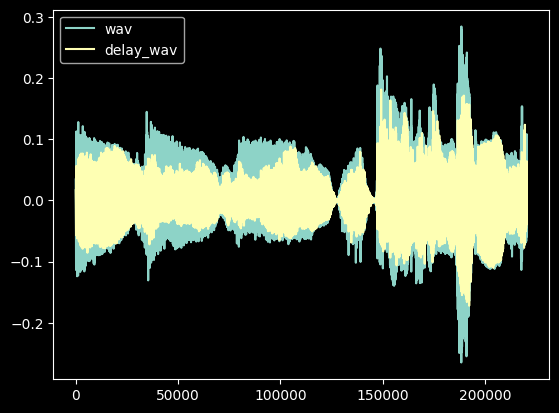

In [5]:
from diffFx_pytorch.processors.delay import SlapbackDelay      
DELAY_DSP_PARAMS = {
    'delay_ms': 30.0,
    'mix': 0.5,
}

Processor = SlapbackDelay(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
delay_wav = Processor(test_wav, None, DELAY_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=delay_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(delay_wav.squeeze().cpu().numpy(),      label='delay_wav')
plt.legend()